# Sentiment Analysis With Basic Neural Network

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import regex as re
from sklearn.model_selection import train_test_split

# Load IMDB dataset
dataset = tfds.load('imdb_reviews', split='train')
dataframe = tfds.as_dataframe(dataset)

# Decode each text and put into pandas df
df = pd.DataFrame()
regexes = (("<", ""), ("br", "", ), ("/>", ""), ("  ", " "))
reviews = []
for text in dataframe['text']:
    text = text.decode()
    for reg in regexes:
        text = re.sub(reg[0], reg[1], text)
    reviews.append(text)
df['text'] = reviews
df['label'] = dataframe['label']

# Split data into training and validation
train_X, test_X, train_y, test_y = train_test_split(df['text'].values, df['label'].values, test_size=0.2)

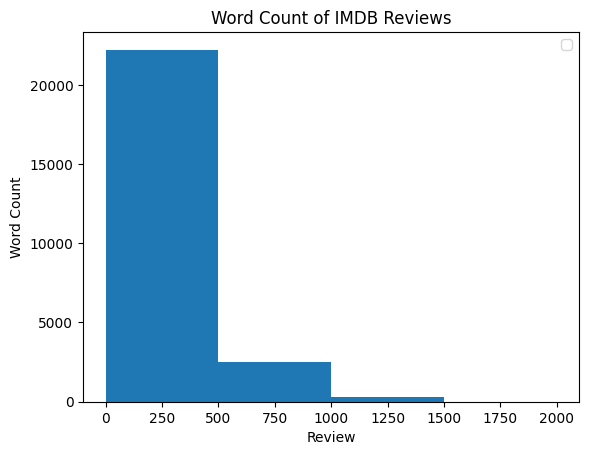

In [7]:
import matplotlib.pyplot as plt
import nltk

# Tokenize each review
tokenized_reviews = []   
for text in df['text']:
    text = nltk.word_tokenize(text)
    tokenized_reviews.append(text)

# Add to new df
df_tok = pd.DataFrame()
df_tok['text'] = tokenized_reviews

# Plot hist of word counts
fig = plt.figure()
ax = fig.add_subplot()
ax.hist([len(text) for text in df_tok['text']], [0, 500, 1000, 1500, 2000])
ax.set_title('Word Count of IMDB Reviews')
ax.set_xlabel('Review')
ax.set_ylabel('Word Count')
ax.legend()

In [26]:
from keras.layers import TextVectorization

# Parameters for vocab size and number of words in a sequence
vocab_size = 10000
sequence_length = 100

# Use TextVectorization to turn strings into vectors of integers
vectorize_layer = TextVectorization(
    standardize='lower_and_strip_punctuation',
    max_tokens=vocab_size, 
    output_mode='int',
    output_sequence_length=sequence_length)

# Build vocabulary
all_reviews = df['text'].values
vectorize_layer.adapt(all_reviews)


In [28]:
# Build model
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)])

# Compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])

# Train model
model.fit(train_X, train_y, epochs=3)

Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 0.5607 - accuracy: 0.6344
Epoch 2/3
625/625 [==============================] - 2s 3ms/step - loss: 0.3366 - accuracy: 0.8501
Epoch 3/3
625/625 [==============================] - 2s 3ms/step - loss: 0.2667 - accuracy: 0.8872
